## Visualization in the data science workflow

Often visualization is taught in isolation, with best practices only discussed in a general way. In reality, you will need to bend the rules for different scenarios. From messy exploratory visualizations to polishing the font sizes of your final product; in this chapter, we dive into how to optimize your visualizations at each step of a data science workflow.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsrename
import numpy as np

%matplotlib inline

### Looking at the farmers market data

Loaded is a new dataset, `markets`. Each row of this DataFrame belongs to an individual farmers market in the continental United States with various information about the market contained in the columns. In this exercise, explore the columns of the data to get familiar with them for future analysis and plotting.

As a first step, print out the first three lines of `markets` to get an idea of what type of data the columns encode. Then look at the summary descriptions of all of the columns. Since there are so many columns in the DataFrame, you'll want to turn the results 'sideways' by transposing the output to avoid cutting off rows.

In [16]:
markets = pd.read_csv('markets_cleaned.csv')

# Print first three rows of data and transpose
first_rows = markets.head(3).transpose()
display(first_rows)

# Get descriptions of every column
col_descriptions = markets.describe(include = 'all',
                                percentiles = [0.5]).transpose()
display(col_descriptions)

,0,1,2
FMID,1018261,1018318,1009364
name,Caledonia Farmers Market Association - Danville,Stearns Homestead Farmers' Market,106 S. Main Street Farmers Market
city,Danville,Parma,Six Mile
county,Caledonia,Cuyahoga,NaN
state,Vermont,Ohio,South Carolina
lat,-72.1403,-81.7339,-82.8187
lon,44.411,41.3748,34.8042
months_open,3,4,NaN
Bakedgoods,1,1,0
Beans,1,0,0


,count,unique,top,freq,mean,std,min,50%,max
FMID,8739,NaN,NaN,NaN,1.01067e+06,55328,1e+06,1.0069e+06,2.00004e+06
name,8739,8158,El Mercado Familiar,33,NaN,NaN,NaN,NaN,NaN
city,8699,4697,Chicago,62,NaN,NaN,NaN,NaN,NaN
county,8228,1503,Los Angeles,121,NaN,NaN,NaN,NaN,NaN
state,8739,53,California,760,NaN,NaN,NaN,NaN,NaN
lat,8710,NaN,NaN,NaN,-90.9257,17.3663,-166.54,-86.2493,-64.7043
lon,8710,NaN,NaN,NaN,39.1337,5.28624,17.7099,40.0178,64.8628
months_open,5452,NaN,NaN,NaN,6.45635,2.74317,1,6,12
Bakedgoods,8739,NaN,NaN,NaN,0.592516,0.491394,0,1,1
Beans,8739,NaN,NaN,NaN,0.0986383,0.298193,0,0,1


### Scatter matrix of numeric columns

You've investigated the new farmer's market data, and it's rather wide – with lots of columns of information for each market's row. Rather than painstakingly going through every combination of numeric columns and making a scatter plot to look at correlations, you decide to make a scatter matrix using the `pandas` built-in function.

Increasing the figure size with the `figsize` argument will help give the dense visualization some breathing room. Since there will be a lot of overlap for the points, decreasing the point opacity will help show the density of these overlaps.

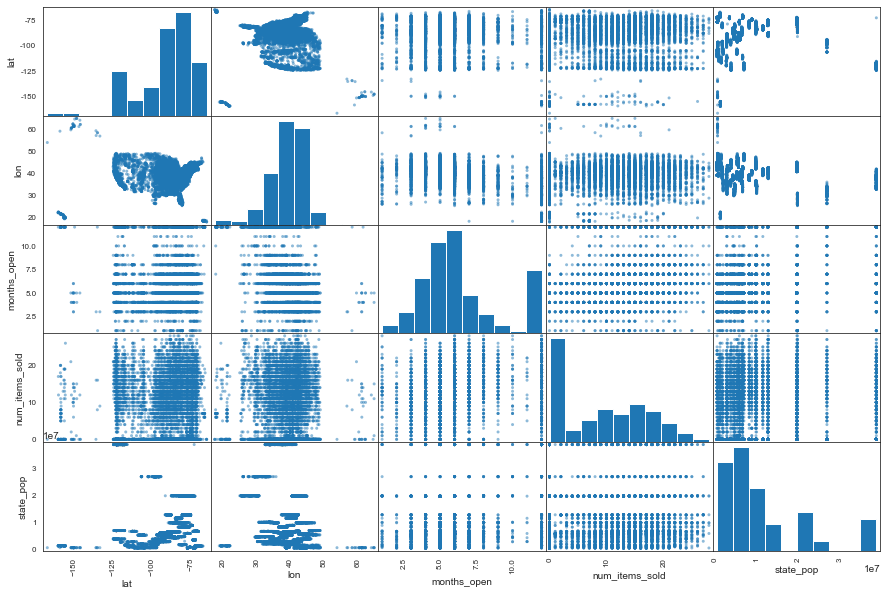

In [17]:
population = pd.read_csv('census-state-populations.csv', index_col='state')

markets['num_items_sold'] = markets.iloc[:, 8:].sum(axis=1)

def state_population(state):
    try:
        return population.loc[state, 'pop_est_2014']
    except:
        return np.nan

markets['state_pop'] = markets.apply(lambda x: state_population(x['state']), axis = 1).dropna()


# Subset the columns of the markets DataFrame to numeric_columns so the scatter matrix only shows numeric non-binary columns.
numeric_columns = ['lat', 'lon', 'months_open', 'num_items_sold', 'state_pop']

# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(markets[numeric_columns], 
                             # Make figure large to show details
                             figsize = (15, 10), 
                             # Lower point opacity to show overlap
                             alpha = 0.5)
plt.show()

### Digging in with basic transforms

You are curious to see if the population of a state correlates to the number of items sold at farmer's markets. To check this, take the log of the population and draw a scatter plot against the number of items sold by a market. From your previous explorations of the dataset, you know there will be a lot of overlap, so to get a better handle on the patterns you want to reduce the marker opacity.

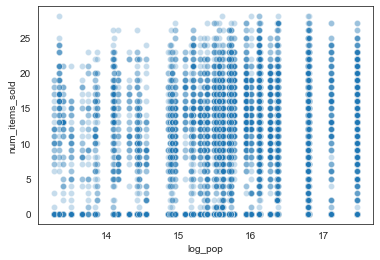

In [18]:
# Create a new logged population column 
markets['log_pop'] = np.log(markets['state_pop'])

# Draw a scatterplot of log-population to # of items sold
sns.scatterplot(x = 'log_pop', 
                  y = 'num_items_sold', 
                  # Reduce point opacity to show overlap
                  alpha = 0.25, 
                  data = markets)


### Is latitude related to months open?

While exploring the farmers market dataset with a scatter matrix, you noticed a potentially interesting relationship between a market's latitude and the number of months it stays open. Digging into this relationship a bit further, you decide to use Seaborn's regression plot to see if there's any weight to this pattern or if the heavy overlap of the points is playing tricks on your eyes.

To make the regression line stand out, you'll want to lower the overlapping background points opacity and color them a muted gray. Since you're not going to be making any formal inference and want to quickly investigate a pattern, you can turn off the default uncertainty band.

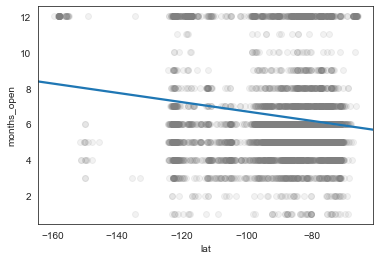

In [19]:
sns.regplot(x = 'lat', 
            y = 'months_open', 
            # Set scatter point opacity & color
            scatter_kws = {'alpha':0.1, 'color':'gray'}, 
            # Disable confidence band
            ci = False, 
            data = markets)

### What state is the most market-friendly?

While exploring the farmer's market data, you wonder what patterns may show up if you aggregated to the state level. Are some states more market-friendly than other states? To investigate this, you group your data by state and get the log-transformed number of markets (`log_markets`) and state populations (`log_pop`).

> ```markets_and_pop = (markets  
    .groupby('state', as_index = False)  
    .agg({  
       'name': lambda d: log(len(d)),  
       'state_pop': lambda d: log(d.iloc[0]) })  
    .rename(columns = {  
        'name': 'log_markets',   
        'state_pop': 'log_pop' }))  
```  

To visualize, you decide to use a regression plot to get an idea of the 'normal' relationship between market and population numbers and a text-scatter to quickly identify interesting outliers.

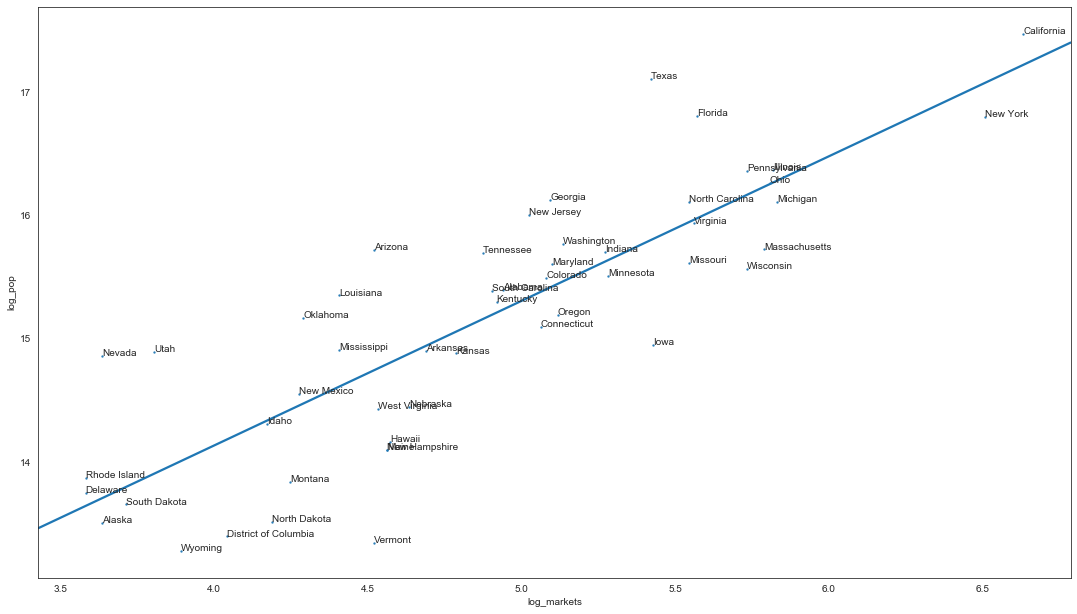

In [20]:
markets_and_pop = (markets
    .groupby('state', as_index = False)
    .agg({
       'name': lambda d: np.log(len(d)),
       'state_pop': lambda d: np.log(d.iloc[0]) })
    .rename(columns = {
        'name': 'log_markets', 
        'state_pop': 'log_pop' }))

g = sns.regplot(
    "log_markets", "log_pop", 
    ci = False,
    # Shrink scatter plot points
    scatter_kws = {'s':2},
    data = markets_and_pop)

g.figure.set_size_inches(18.5, 10.5)

# Iterate over the rows of the data
for _, row in markets_and_pop.iterrows():
    state, log_markets, log_pop = row
    # Place annotation and reduce size for clarity
    g.annotate(state, (log_markets,log_pop), size = 10)



### Popularity of goods sold by state

The farmer's market dataset contains columns corresponding to 28 different goods and whether or not they are sold at that market. You're curious to see if there are any interesting stories in this dataset regarding how likely you are to find a given good at a state's markets. To answer this question, you collapse the data into three columns:

* `state` - the name of the state
* `good` - the good of interest
* `prop_selling` - the proportion of markets in that state that sell that good  

To quickly determine if patterns emerge, you choose a subset of goods you find interesting and decide to make a simple text-scatter: the good on the x-axis and the proportion of a state's markets that sell that good on the y-axis.

In [21]:
_ = markets.copy()
_.drop(columns = ['FMID', 'name', 'city', 'county','lat', 'lon', 'months_open', 'state_pop', 'log_pop', 'num_items_sold'], inplace=True)

_ = _.groupby('state').sum()
_ = _.div(_.sum(axis=1), axis=0)

goods_by_state = pd.DataFrame(_.stack())
goods_by_state = goods_by_state.reset_index()
goods_by_state.columns = ['state', 'good', 'prop_selling']
display(goods_by_state.head())


,state,good,prop_selling
0,Alabama,Bakedgoods,0.081046
1,Alabama,Beans,0.007843
2,Alabama,Cheese,0.022222
3,Alabama,Coffee,0.018301
4,Alabama,Crafts,0.041830


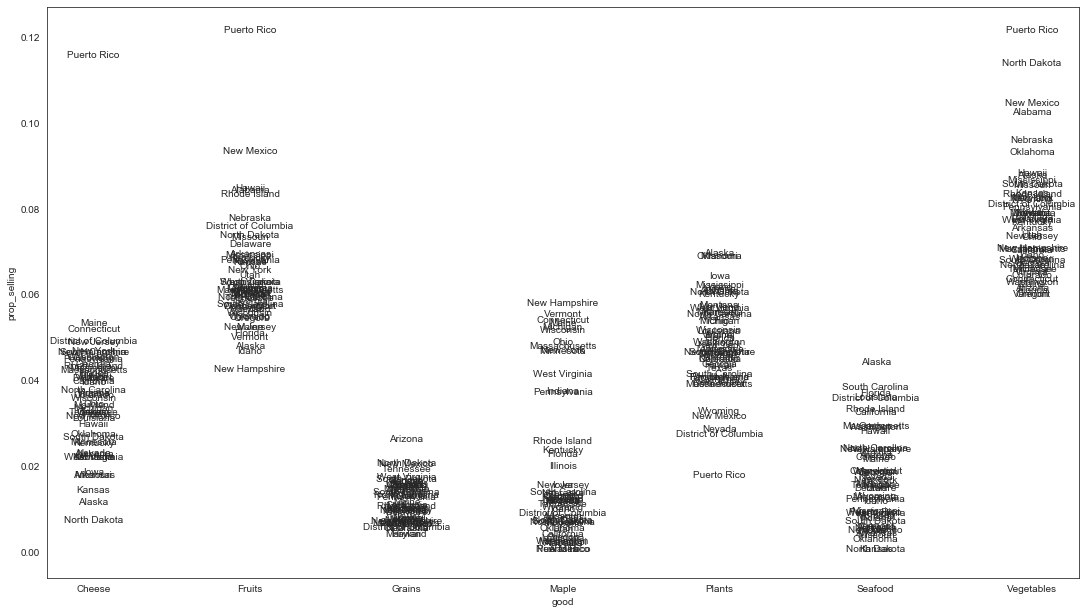

In [22]:
# Subset goods to interesting ones
to_plot = ['Cheese','Maple','Fruits','Grains','Seafood','Plants','Vegetables']

# Subset goods to interesting ones
to_plot = ['Cheese','Maple','Fruits','Grains','Seafood','Plants','Vegetables']
goods_by_state_small = goods_by_state.query("good in "+str(to_plot))

g = sns.scatterplot('good','prop_selling', data = goods_by_state_small,
                    # Hide scatter points by shrinking to nothing
                    s = 0)

g.figure.set_size_inches(18.5, 10.5)

for _,row in goods_by_state_small.iterrows():
  g.annotate(row['state'], (row['good'], row['prop_selling']), 
             # Center annotation on axis
             ha = 'center', 
             size = 10)


### Stacking to find trends

In the farmers market dataset, you are interested in the number of months that a market stays open in relation to its geography, more specifically its longitude. You're curious to see if there are any regions of the country that behave noticeably different from the others.

To do this, you create a basic map with a scatter plot of the latitude and longitude of each market, coloring each market by the number of months it's open. Further digging into the latitude relationship, you draw a regression plot of the latitude to the number of months open with a flexible fit line to determine if any trends appear. You want to view these simultaneously to get the clearest picture of the trends.

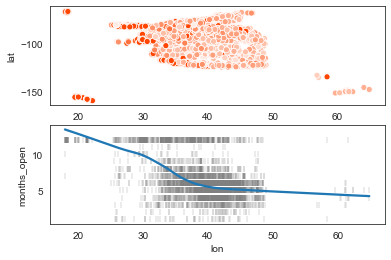

In [23]:
# Setup two stacked plots
_, (ax1, ax2) = plt.subplots(2, 1)

# Draw location scatter plot on first plot
sns.scatterplot("lon", "lat", 'months_open', 
                palette = sns.light_palette("orangered",n_colors = 12), 
                legend = False, data = markets,
                ax = ax1);

# Plot a regression plot on second plot
sns.regplot('lon', 'months_open',
            scatter_kws = {'alpha': 0.2, 'color': 'gray', 'marker': '|'},
            lowess = True,
            marker = '|', data = markets, 
            ax = ax2)


### Using a plot as a legend

One interesting thread of investigation in the farmer's market data is a state's "market friendliness" and specifically, the outliers. One way to look at this is by using the ratio of farmer's markets to people by state. You could directly look at the ratio; however, a ratio throws away the raw information about a state's population and the number of markets. A large state with a high ratio could be more interesting than a small one.

You can show both the ratio and raw numbers by drawing two plots, one of the ratio and the other of the market number to population scatter plot. To help simplify your now dense visualization, you can use the bar plot as a legend; calling out interesting states by matching the colors of their bars and scatter points.

In [24]:
markets_by_state = (markets
    .groupby('state', as_index = False)
    .agg({
       'name': lambda d: len(d),
       'state_pop': lambda d: d.iloc[0] })
    .rename(columns = {
        'name': 'num_markets', 
        'state_pop': 'population' })).dropna()


markets_by_state['people_per_market'] = markets_by_state['population'].div(markets_by_state['num_markets'])
markets_by_state['log_pop'] = np.log(markets_by_state['population'])
markets_by_state['log_markets'] = np.log(markets_by_state['num_markets'])

selected_states = ['Vermont', 'Maryland', 'Texas']
markets_by_state['is_selected'] = np.where(markets_by_state['state'].isin(selected_states), markets_by_state['state'], 'other')
markets_by_state.sort_values('people_per_market', inplace=True)
display(markets_by_state.head())


,state,num_markets,population,people_per_market,log_pop,log_markets,is_selected
46,Vermont,92,626562.0,6810.456522,13.348003,4.521789,Vermont
34,North Dakota,66,739482.0,11204.272727,13.513705,4.189655,other
8,District of Columbia,57,658893.0,11559.526316,13.398316,4.043051,other
52,Wyoming,49,584153.0,11921.489796,13.277918,3.891820,other
15,Iowa,228,3107126.0,13627.745614,14.949209,5.429346,other


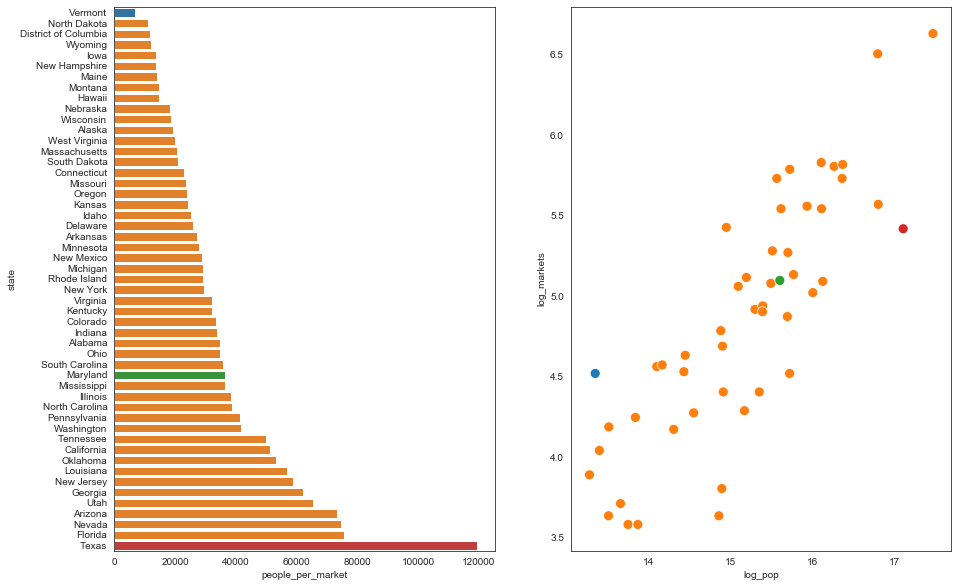

In [25]:
# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))

# Map the column for selected states to the bar color
sns.barplot('people_per_market', 'state', hue = 'is_selected',
            # Disable dodge so bars are full size
            dodge = False, 
            data = markets_by_state, ax = ax1)

# Map selected states to point color
sns.scatterplot('log_pop', 'log_markets', hue = 'is_selected', 
                data = markets_by_state, ax = ax2, s = 100)

# Remove the legend for both plots
ax1.legend_.remove()
ax2.legend_.remove() 

### Cleaning up the background

While exploring state-level patterns in goods sold at farmer's markets, a few states stood out to you. North Dakota and New Mexico routinely fell near the bottom of the states regarding their proportion of farmer's markets selling a given good. Whereas Vermont was always near the top. You want to present the general patterns in good sales by state, while also highlighting the states you found interesting.

You make a scatter plot of goods being sold by the proportion of markets that sell that good in a state. To highlight the interesting states, you draw a line between each of the state's points. To make a clean and minimal plot, you reduce the background to a simple set of orienting grids.

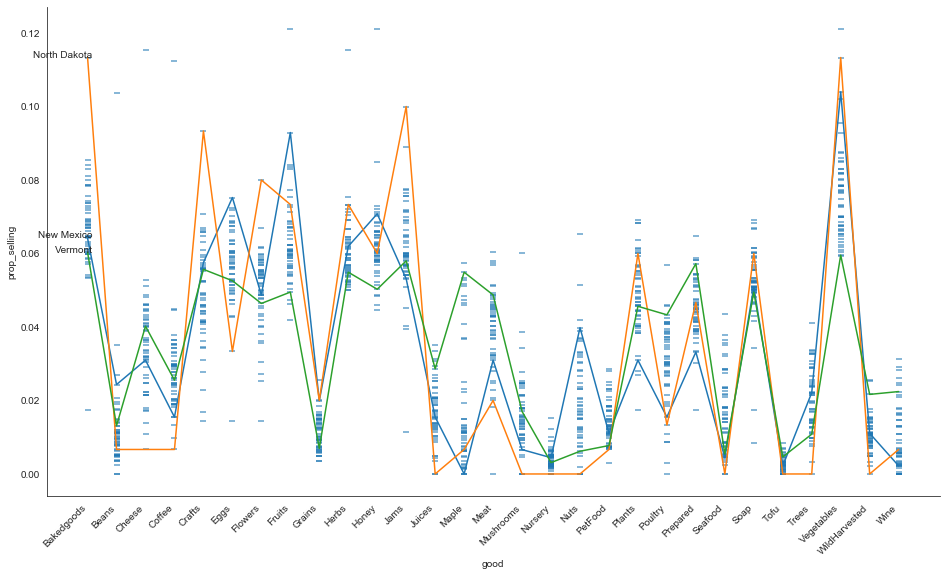

In [26]:
# Set background to white with grid
sns.set_style('white')

plt.scatter('good','prop_selling', marker = '_', alpha = 0.7, data = goods_by_state)


# Draw lines across goods for highlighted states
highlighted = goods_by_state.query("state in ['New Mexico','North Dakota','Vermont']")
g = sns.lineplot('good','prop_selling', 'state', data = highlighted, legend = False)

# Draw state name at end of lines
last_rows = highlighted.groupby('state', as_index = False).agg('first')
for _,row in last_rows.iterrows():
    plt.annotate(row['state'], (row['good'], row['prop_selling']),
                 ha = 'right', xytext = (5,0), textcoords = 'offset pixels')

# Remove all borders
sns.despine(left = False, bottom= False)

g.figure.set_size_inches(16.0, 9.0)
plt.xticks(rotation = 45, ha ='right')
plt.show()

### Enhancing legibility

You and your colleagues have decided that the most important aspect of the data you want to show is the differences between the most "market-friendly" state, Vermont, and the least, Texas. To do this, put two plots side by side – a barplot showing the number of people per farmer's market in the state and a scatter plot showing the population on the x-axis and the number of markets on the y-axis.

Emphasize your findings by calling out Vermont and Texas by assigning them distinct colors. Also, provide a large and easy to read annotation for Texas.

Supplied is a vector `state_colors` that assigns Vermont and Texas unique colors and all other states gray along with the annotation describing Texas, `tx_message`.

In [30]:
#print(markets_by_state.columns)
#markets_by_state.drop(['log_pop', 'log_markets', 'is_selected'], axis = 1, inplace = True)
display(markets_by_state.head())


,state,num_markets,population,people_per_market
46,Vermont,92,626562.0,6810.456522
34,North Dakota,66,739482.0,11204.272727
8,District of Columbia,57,658893.0,11559.526316
52,Wyoming,49,584153.0,11921.489796
15,Iowa,228,3107126.0,13627.745614


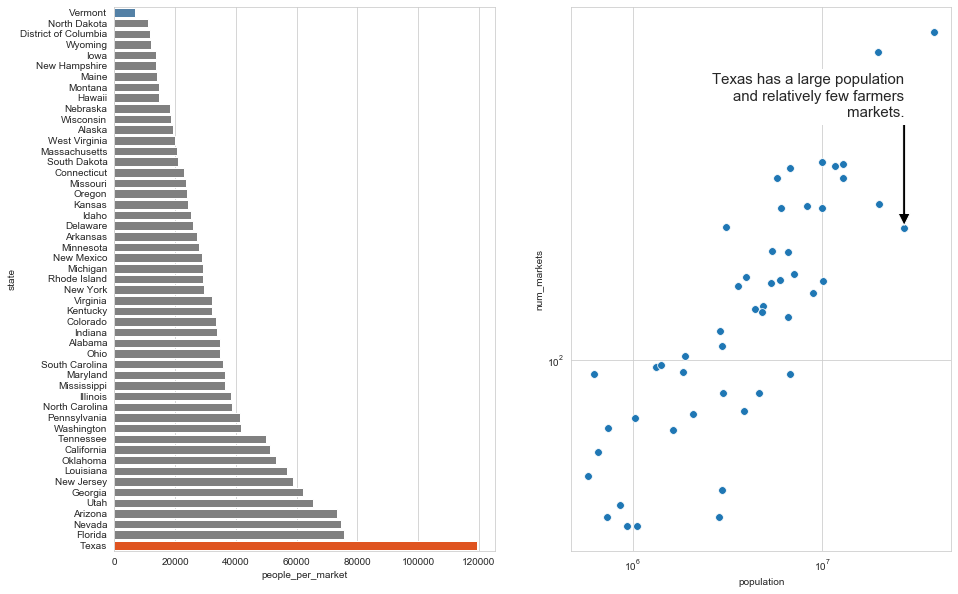

In [39]:
state_colors = ['steelblue','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray',
 'gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray',
 'gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','orangered']

tx_message = 'Texas has a large population\nand relatively few farmers\nmarkets.'

# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))

# Draw barplot w/ colors mapped to state_colors vector
sns.barplot('people_per_market', 'state', palette = state_colors,
            data = markets_by_state, ax = ax1)

# Map state colors vector to the scatterplot as well
p = sns.scatterplot('population', 'num_markets', 
                    #color = state_colors,
                    data = markets_by_state, 
                    s = 60, 
                    ax = ax2)

# Log the x and y scales of our scatter plot so it's easier to read
ax2.set(xscale = "log", yscale = 'log')

# Increase annotation text size for legibility
ax2.annotate(tx_message, xy = (26956958,230), 
             xytext = (26956958, 450),ha = 'right', 
             size = 15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})
sns.set_style('whitegrid')
plt.show()